# Sequence Models: Kaggle Competitions
This notebook uses `TextVectorization` instead of `Tokenizer` for text preprocessing.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import TextVectorization, Embedding, SimpleRNN, Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import tensorflow as tf

!git clone https://github.com/cbtn-data-science-ml/tensorflow-professional-developer.git



Cloning into 'tensorflow-professional-developer'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 259 (delta 11), reused 17 (delta 6), pack-reused 236 (from 1)
Receiving objects: 100% (259/259), 9.29 MiB | 7.74 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [ ]:
%pwd


'/content'

In [ ]:


%cd '/content/tensorflow-professional-developer'



/content/tensorflow-professional-developer


In [ ]:
train_path = 'nlp_disaster_tweets/train.csv'
test_path = 'nlp_disaster_tweets/test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

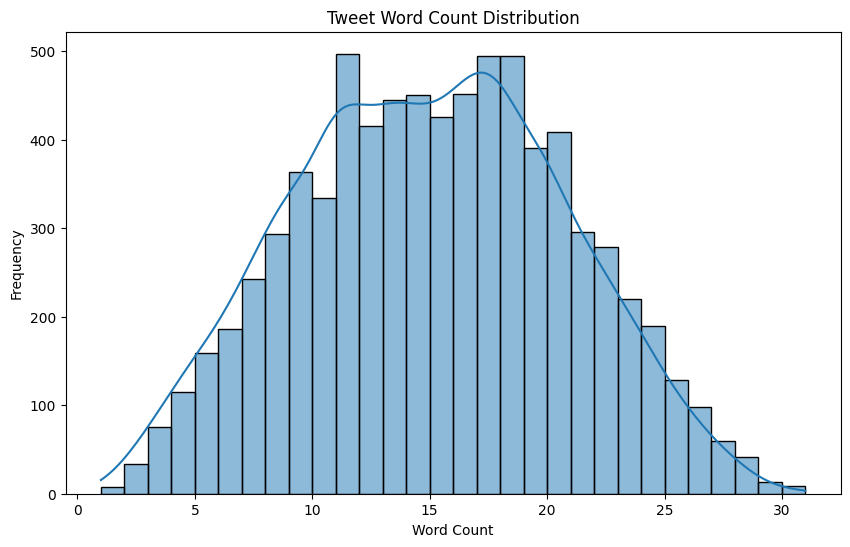

In [ ]:
# word count for each tweet
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(train_df['word_count'], bins=30, kde=True)
plt.title('Tweet Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# Before Cleaning Check
train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   int64 
 1   keyword     7552 non-null   object
 2   location    5080 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   word_count  7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [ ]:
urls_before_cleaning = train_df['text'].str.contains(r'http\S+|www\S+|https\S+').sum()
print(f"URLs found before cleaning: {urls_before_cleaning}")


URLs found before cleaning: 3976


In [ ]:
# !pip install nltk # natural language toolkit

### Mini Lesson: Text Cleaning in NLP with `stopwords`, `lemmatization`, and `WordNetLemmatizer`

When processing text data for NLP tasks, cleaning and normalizing text is crucial. Let’s break down **lemmatization**, **stopwords**, and the **WordNetLemmatizer** in simple terms with examples.

---

### **1. What are Stopwords?**
- **Definition**: Stopwords are common words in a language (like "the", "is", "and", "in") that don't carry significant meaning for most NLP tasks.
- **Why Remove Them?**:
  - Including stopwords adds noise to your dataset.
  - Removing them focuses the model on meaningful words.

#### **Example**:
Original Sentence:
```text
"This is a sample sentence for text cleaning."
```
Stopwords Removed:
```text
"sample sentence text cleaning"
```

---

### **2. What is Lemmatization?**
- **Definition**: Lemmatization is the process of reducing a word to its root or base form (called the **lemma**), while ensuring that the resulting word is a valid word in the language.

#### **Why Lemmatization?**
- Unlike stemming (which might chop off word endings), lemmatization produces proper words that are more meaningful and contextually correct.
- Example:
  - **Word**: "running"
  - **Lemmatized**: "run"

#### **How Does It Work?**
- Lemmatization uses **WordNet**, a large lexical database, to determine the correct base form (lemma) of the word based on its part of speech (POS).

---

### **3. WordNetLemmatizer**
- **What is it?**
  - A tool in NLTK that performs lemmatization.
  - It uses WordNet, a lexical database of English, to find the lemma of a word.
- **Why Use It?**
  - To normalize words in text while keeping them valid and meaningful.

#### **Example**:
Without Lemmatization:
```text
["running", "runs", "ran"]
```
With Lemmatization:
```text
["run", "run", "run"]
```

---

### **Step-by-Step Breakdown of `clean_text` Function**

Here’s how each part of the function works:

1. **Convert to Lowercase**:
   - Ensures all words are in lowercase to avoid case sensitivity issues.
   - Example:
     - Input: `"The QUICK brown fox"`
     - Output: `"the quick brown fox"`

2. **Remove URLs**:
   - Strips out links like `http://example.com` or `www.example.com`.
   - Uses regex to identify patterns starting with "http" or "www".
   - Example:
     - Input: `"Check this: http://example.com"`
     - Output: `"Check this:"`

3. **Remove HTML Tags**:
   - Removes HTML elements like `<p>` or `<div>` that might exist in scraped text.
   - Example:
     - Input: `"<p>This is a paragraph</p>"`
     - Output: `"This is a paragraph"`

4. **Remove Special Characters and Numbers**:
   - Retains only alphabets and spaces (no punctuation or digits).
   - Example:
     - Input: `"This sentence has 100% special chars!$"`
     - Output: `"this sentence has special chars"`

5. **Tokenization**:
   - Splits text into individual words (tokens) using `word_tokenize`.
   - Example:
     - Input: `"text cleaning example"`
     - Output: `["text", "cleaning", "example"]`

6. **Remove Stopwords**:
   - Removes common but uninformative words using `stopwords.words("english")`.
   - Example:
     - Input: `["this", "is", "an", "example"]`
     - Output: `["example"]`

7. **Lemmatization**:
   - Converts words to their root form using `WordNetLemmatizer`.
   - Example:
     - Input: `["running", "flies", "better"]`
     - Output: `["run", "fly", "better"]`

---

### **Code Walkthrough with Example**

Input Text:
```python
sample_text = "The quick brown foxes were jumping over the lazy dogs! Check out http://example.com"
cleaned_text = clean_text(sample_text)
print(cleaned_text)
```

**Step-by-Step Output**:
1. Lowercase:
   ```
   "the quick brown foxes were jumping over the lazy dogs! check out http://example.com"
   ```
2. Remove URLs:
   ```
   "the quick brown foxes were jumping over the lazy dogs! check out"
   ```
3. Remove HTML (none here):
   ```
   "the quick brown foxes were jumping over the lazy dogs! check out"
   ```
4. Remove special characters:
   ```
   "the quick brown foxes were jumping over the lazy dogs check out"
   ```
5. Tokenization:
   ```
   ["the", "quick", "brown", "foxes", "were", "jumping", "over", "the", "lazy", "dogs", "check", "out"]
   ```
6. Remove Stopwords:
   ```
   ["quick", "brown", "foxes", "jumping", "lazy", "dogs", "check"]
   ```
7. Lemmatization:
   ```
   "quick brown fox jump lazy dog check"
   ```

---

### **When to Use Each Technique**

1. **Stopword Removal**:
   - Use when stopwords don’t contribute to your NLP task (e.g., classification or clustering).
   - Avoid removing stopwords if sentence structure matters (e.g., sentiment analysis).

2. **Lemmatization**:
   - Use for tasks where different forms of a word (e.g., "run", "running", "ran") need to be treated as the same word.

3. **WordNetLemmatizer**:
   - Ideal for text normalization when you need meaningful base forms of words.

---

### Summary

The `clean_text` function integrates all these techniques to prepare clean and normalized text for NLP tasks. Here's the flow:
1. Text is converted to lowercase for consistency.
2. Unnecessary noise (URLs, HTML, special characters) is removed.
3. Words are tokenized into individual units.
4. Stopwords are filtered out to focus on meaningful words.
5. Words are lemmatized to their base forms using `WordNetLemmatizer`.

Together, these steps ensure your text is clean, compact, and ready for machine learning models.

In [ ]:


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# function to clean our text data
def clean_text(text):
  text = text.lower()
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'[^a-z\s]', '', text)
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words("english"))
  filtered_tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
  return " ".join(lemmatized_tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:

# Apply the cleaning function to train_df['text']
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)


NameError: name 'train_df' is not defined

In [ ]:

# Hyperparameters
VOCAB_SIZE = 1000
MAX_LEN = 20
EMBEDDING_OUTPUT_DIM = 64
DROPOUT_RATE = 0.5
RNN_UNITS = 64
EPOCHS = 10
BATCH_SIZE = 20
LEARNING_RATE = 0.0001



In [ ]:
# TextVectorization Layer
vectorizer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=MAX_LEN
)
vectorizer.adapt(train_df['clean_text'].astype(str))

# Preprocess the data: Vectorize the text and convert to NumPy array
X = vectorizer(train_df['clean_text'].astype(str)).numpy()
y = train_df['target'].values  # Extract labels

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)





NameError: name 'TextVectorization' is not defined

In [ ]:
!wget https://raw.githubusercontent.com/cbtn-data-science-ml/introduction-to-deep-learning/main/model_utils.py
from model_utils import early_stopping_callback, model_checkpoint_callback, plot_loss_and_accuracy


--2024-11-18 16:52:52--  https://raw.githubusercontent.com/cbtn-data-science-ml/introduction-to-deep-learning/main/model_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2305 (2.3K) [text/plain]
Saving to: ‘model_utils.py.1’

model_utils.py.1    100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-11-18 16:52:52 (53.5 MB/s) - ‘model_utils.py.1’ saved [2305/2305]



In [ ]:
# Build the model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_OUTPUT_DIM),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(16)),
    Dropout(DROPOUT_RATE),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_callback, model_checkpoint_callback]
)


Epoch 1/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5600 - loss: 0.6864 - val_accuracy: 0.5739 - val_loss: 0.6721
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5719 - loss: 0.6694 - val_accuracy: 0.6461 - val_loss: 0.6201
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7425 - loss: 0.5439 - val_accuracy: 0.7879 - val_loss: 0.4817
Epoch 4/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8174 - loss: 0.4250 - val_accuracy: 0.7636 - val_loss: 0.4931
Epoch 5/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8270 - loss: 0.4006 - val_accuracy: 0.7886 - val_loss: 0.4834
Epoch 6/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8436 - loss: 0.3687 - val_accuracy: 0.7879 - val_loss: 0.4758
Epoch 7/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8336 - loss: 0.3867 - val_accuracy: 0.7761 - val_loss: 0.4964
Epoch 8/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8389 - loss: 0.3763 - val_acc

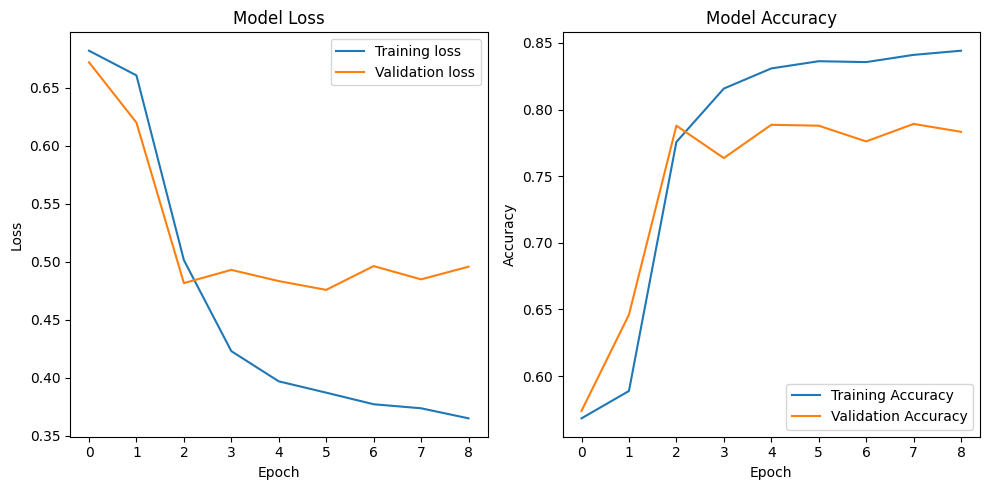

In [ ]:
plot_loss_and_accuracy(history)

In [ ]:
# Challenge: Use Functional API and try to improve model and check your score on Kaggle competition

In [ ]:
# Prepare Kaggle Contest Output

# Vectorize the test dataset
X_test = vectorizer(test_df['clean_text'].astype(str)).numpy()

# Predict using the trained model
predictions = model.predict(X_test)

# Convert predictions to binary (0 or 1)
predictions_binary = (predictions > 0.5).astype(int).reshape(-1)

# Create a submission file for Kaggle
submission = pd.DataFrame({'id': test_df['id'], 'target': predictions_binary})
submission.to_csv('submission.csv', index=False)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
# Embedding Projector
# Link: https://www.tensorflow.org/text/guide/word_embeddings

# Create a reverse index for words from the TextVectorization vocabulary
def get_reverse_index(vectorizer):
    vocabulary = vectorizer.get_vocabulary()
    return {idx: word for idx, word in enumerate(vocabulary)}

reverse_index = get_reverse_index(vectorizer)

import numpy as np

# Assuming 'model' is your trained model and the first layer is the embedding layer
embedding_layer = model.layers[0]  # The Embedding layer is the first layer in the Sequential model
embeddings = embedding_layer.get_weights()[0]

# Save the embeddings for TensorFlow Embedding Projector
np.savetxt("vectors.tsv", embeddings, delimiter="\t")

# Prepare the metadata file
with open("metadata.tsv", "w", encoding='utf-8') as f:
    # Explicitly account for the padding token
    f.write("<PAD>\n")
    # Write the words from the reverse index
    for i in range(1, len(reverse_index)):  # Skip the padding token
        f.write(reverse_index[i] + "\n")

# Download the files for TensorFlow Embedding Projector
from google.colab import files
files.download("vectors.tsv")
files.download("metadata.tsv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense

# Define the input layer
inputs = Input(shape=(MAX_LEN,))  # MAX_LEN is the length of input sequences

# Add embedding layer
x = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_OUTPUT_DIM)(inputs)

# Add bidirectional LSTM layers
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = Bidirectional(LSTM(16))(x)

# Add dropout for regularization
x = Dropout(DROPOUT_RATE)(x)

# Add dense output layer
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs, name="Functional_Bidirectional_LSTM_Model")

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_callback, model_checkpoint_callback]
)


Epoch 1/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5532 - loss: 0.6859 - val_accuracy: 0.5739 - val_loss: 0.6702
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5755 - loss: 0.6682 - val_accuracy: 0.6776 - val_loss: 0.6122
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7511 - loss: 0.5322 - val_accuracy: 0.7820 - val_loss: 0.4762


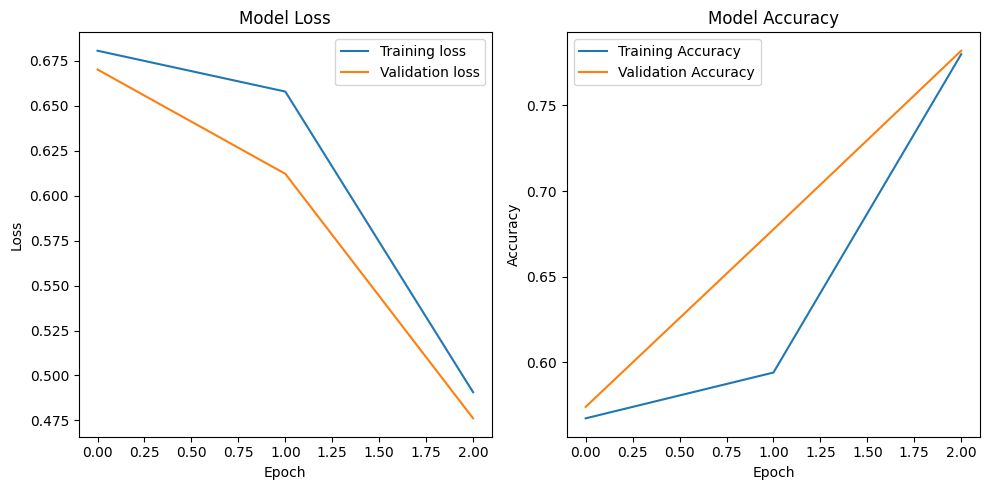

In [ ]:
plot_loss_and_accuracy(history)